# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [35]:
# Details Student :
# Name: Denis Kutman
# ID: 316106350
# Mail: Dennisman1996@gmail.com





## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [36]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------
from sklearn.feature_selection import SelectKBest, chi2 ,mutual_info_classif
from sklearn.model_selection import  cross_validate ,RepeatedKFold , RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier ,AdaBoostClassifier , BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot
from numpy import mean ,std




# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [37]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [38]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [39]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [40]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [41]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [42]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [43]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [44]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [45]:
def clean_text(text):
    # החלפת כל ספרות במחרוזת ריקה
    text = re.sub(r'\d+', '', text)
    
    # החלפת כל תווים שאינם אותיות או רווחים במחרוזת ריקה
    text = re.sub(r'[^\w\s]', '', text)
    
    # החלפת כל רצפי רווחים ברווח יחיד
    text = re.sub(r'\s+', ' ', text)
    
    # הסרת רווחים מתחילת וסוף המחרוזת
    text = text.strip()
    
    # החזרת הטקסט הנקי
    return text


In [46]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

נתחיל בהגרת מודלי סיווג אשר ישמשו אותנו ללמידת מכונה

In [47]:
# models:
models_list = {'lr': LogisticRegression(),
                'knn': KNeighborsClassifier(),
                'cart': DecisionTreeClassifier(),
                'svm': SVC(),
                'LinearSVC':LinearSVC(),
                'MLPClassifier':MLPClassifier(),
                'Perceptron':Perceptron(),
                'SGDClassifier':SGDClassifier()
                }

ראשית, ניצור מילון בשם 'היפרפרמטרים' המכיל היפרפרמטרים עבור מספר מודלים של למידת מכונה שיוכשרו ויוערכו בהמשך.

In [48]:
# פרמטרים להגדרת המודלים
hyperparameters = {'lr': { 'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'] },
                    'knn': { 'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15] , 'weights': ['uniform', 'distance'] },
                    'cart': { 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8] },
                    'svm': {'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] },
                    'LinearSVC': { 'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'dual': [False] },
                    'MLPClassifier': { 'hidden_layer_sizes': [(10,), (50,), (100,)], 'activation': ['relu', 'tanh', 'logistic'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'learning_rate': ['constant', 'adaptive'] },
                    'Perceptron': { 'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1] },
                    'SGDClassifier': { 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1] } 
                    }

עכשיו הכנתי פונקציה שנהגה לעבד מראש ולפצל את הקורפוס המובא לאימון מודל למידת מכונה, כך יהיה קל יותר לבצע שינויים ולנסות לשפר את המודל שלנו.

In [49]:
def set_train_data(vectorizer='TfidfVectorizer', ngram_range=(1, 1), min_df=5, k=1000):
    train_filename = 'annotated_corpus_for_train.csv'
    df = pd.read_csv(train_filename, encoding='utf-8')  # טוען את המידע

    df['story'] = df['story'].apply(clean_text)  # מנקה את הטקסט ומחליף אותו במידע הנקי

    X_train, X_test, y_train, y_test = train_test_split(df['story'], df['gender'], test_size=0.2, random_state=42)  # מפצל את המידע לקבוצת אימון ובדיקה

    # המרת הטקסט למטריצות מאפיינים באמצעות TfidfVectorizer או CountVectorizer. בררת המחדל היא TfidfVectorizer (שנה ל-CountVectorizer כדי להשתמש בו)
    if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range)

    if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df=min_df)

    # התאמת המטריצה למידע האימון
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)  # החלת המטריצה על המידע בדיקה

    # בחירת מאפיינים באמצעות מידע משותף או chi2. בררת המחדל היא mutual_info_classif (שנה ל-chi2 כדי להשתמש בו)
    selector = SelectKBest(mutual_info_classif, k=k)  # chi2 # mutual_info_classif
    selector.fit(X_train_vect, y_train)  # התאמת המאפיינים למידע האימון

    # החלת הבחירה של המאפיינים על המטריצה
    X_train_selected = selector.transform(X_train_vect)  # החלת הבחירה על מידע האימון
    X_test_selected = selector.transform(X_test_vect)  # החלת הבחירה על מידע הבדיקה

    # סקילת המידע:
    scaler = MinMaxScaler()  # סקלת המידע באמצעות MinMaxScaler

    # התאמת הסקלר למידע האימון
    X_train_scaled = scaler.fit_transform(X_train_selected.toarray())  # החלת הסקלר על מידע האימון
    X_test_scaled = scaler.transform(X_test_selected.toarray())  # החלת הסקלר על מידע הבדיקה

    return X_train_scaled, X_test_scaled, X_train, X_test, y_train, y_test

פונקציה זו משמשת להכנת נתוני הבדיקה.
לבסוף, הפונקציה מחזירה את עמודת הסיפור המקורית של נתוני הבדיקה ואת התכונות שנבחרו בקנה מידה עבור נתוני הבדיקה.

In [50]:
def set_test_data(vectorizer='TfidfVectorizer', ngram_range=(1, 1), min_df=5, k=1000):
    test_filename = 'corpus_for_test.csv'
    df = pd.read_csv(test_filename, encoding='utf-8')  # טוען את הנתונים

    df['story'] = df['story'].apply(clean_text)  # מנקה את הטקסט ומחליף אותו בנתונים המנוקים

    # מנורמל את הנתונים הטקסטואליים באמצעות TfidfVectorizer או CountVectorizer. הברירת מחדל היא TfidfVectorizer (יש לשנות ל-CountVectorizer כדי להשתמש בו)
    if vectorizer == 'TfidfVectorizer':
        vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range)

    if vectorizer == 'CountVectorizer':
        vectorizer = CountVectorizer(min_df=min_df)

    # מתאים את המנורמלזציה לנתוני האימון
    X_test = df['story']
    X_test_vect = vectorizer.fit_transform(X_test)  # מחבר את המנורמלזציה לנתוני הבדיקה

    # בחירת מאפיינים באמצעות המידע המשותף או chi2. הברירת מחדל היא mutual_info_classif (יש לשנות ל-chi2 כדי להשתמש בו)
    selector = SelectKBest(mutual_info_classif, k=k)  # chi2 # mutual_info_classif

    # מחיל את הבחירה במאפיינים על הנתונים המונרמלזים
    X_test_selected = selector.fit_transform(X_test_vect, np.zeros(X_test_vect.shape[0]))  # מותא את הבחירה לנתוני הבדיקה

    # מעלה את הנתונים לסולם:
    scaler = MinMaxScaler()  # משנה את הנתונים באמצעות MinMaxScaler

    # מתאים את הסולם לנתוני האימון
    X_test_scaled = scaler.fit_transform(X_test_selected.toarray())  # מחבר את הסולם לנתוני הבדיקה

    return df['story'], X_test_scaled

קוד זה מגדיר פונקציה שנקראת get_stacking המחזירה אנסמבל ערימה של מודלים. Stacking היא טכניקת לימוד אנסמבל שבה מאומנים מספר מודלים בסיסיים ומשולבים התחזיות שלהם לביצוע חיזוי סופי באמצעות מטא-מודל.

In [51]:
# ערימה לסיווג באמצעות מודל רגרסיה לוגיסטי כדי ללמוד כיצד לשקלל את התחזיות של תת-המודלים 
def get_stacking_ensemble(hyperparameters):
    base_models = []
    base_models.append(('lr_bagging', BaggingClassifier(base_estimator=LogisticRegression(**hyperparameters['lr']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('knn_bagging', BaggingClassifier(base_estimator=KNeighborsClassifier(**hyperparameters['knn']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('cart_bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(**hyperparameters['cart']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('svm_bagging', BaggingClassifier(base_estimator=SVC(**hyperparameters['svm']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('LinearSVC_bagging', BaggingClassifier(base_estimator=LinearSVC(**hyperparameters['LinearSVC']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('SGDClassifier_bagging', BaggingClassifier(base_estimator=SGDClassifier(**hyperparameters['SGDClassifier']), n_estimators=100, max_samples=0.8, oob_score=False)))
    base_models.append(('MLPClassifier', MLPClassifier(**hyperparameters['MLPClassifier'])))
    base_models.append(('Perceptron', Perceptron(**hyperparameters['Perceptron'])))
    meta_model = LogisticRegression(**hyperparameters['lr'])
    stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    return stacked_model 

פונקציה זו מחזירה מילון מודלים של למידת מכונה, כל דגם הוא מופע של מחלקה מסווגת אחרת. מילון ההיפרפרמטרים מועבר כארגומנט לפונקציה זו,  ומכיל את פרמטרי ההיפר של כל מסווג.

In [52]:
# מפרק את מילון הדגמים ומחזיר רשימה של דכמים להערכה
def get_models(hyperparameters):
    models = dict()
    models['lr'] = LogisticRegression(**hyperparameters['lr'])
    models['knn'] = KNeighborsClassifier(**hyperparameters['knn'])
    models['cart'] = DecisionTreeClassifier(**hyperparameters['cart'])
    models['svm'] = SVC(**hyperparameters['svm'])
    models['LinearSVC'] = LinearSVC(**hyperparameters['LinearSVC'])
    models['MLPClassifier'] = MLPClassifier(**hyperparameters['MLPClassifier'])
    models['Perceptron'] = Perceptron(**hyperparameters['Perceptron'])
    models['SGDClassifier'] = SGDClassifier(**hyperparameters['SGDClassifier'])
    
    models['stacking'] = get_stacking_ensemble(hyperparameters)
    return models


הפונקציה find_best_params לוקחת מילון של מודלים, נתוני האימון, ומבצעת חיפוש רשת כדי למצוא את ההיפרפרמטרים הטובים ביותר עבור כל מודל במודלים.

In [53]:
# מוצא את הפרמטרים הטובים ביותר עבור כל דגם
def find_best_hyperparams(models , X_train_selected ,y_train ):
    best_params = {}
    for name, model in models.items():
        print("Tuning", name)
        clf = GridSearchCV(model, hyperparameters[name], cv=5, n_jobs=-1)
        clf.fit(X_train_selected, y_train)
        best_params[name] = clf.best_params_
        
    return best_params

פונקציה זו מעריכה מודל באמצעות אימות צולב ומחשבת דיוק, ציון F1 ומטריצת הבלבול.

In [61]:
# הערך את כל דגמי המודל באמצעות הערכה המתוך-הקרן ופרמטרים היפר מגוונים
def evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test):
    # הכשר את המודל על קבוצת הנתונים למידה
    model_train = model.fit(X_train_selected, y_train) 

    # הערך את המודל עם ערכה המתוך-הקרן
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42) # הגדר את השלב האופן המשובצים עם ערכה המתוך-הקרן
                                                                 # (חוזר על השלב המתוך-הקרן k פעמים n פעמים ומספק הערכות מדויקות יותר של ביצועי המודל)
    
    # הערך את המודל ואסף את הציונים
    scores = cross_val_score(model_train, X_test_selected, y_test, scoring='accuracy', cv=cv, n_jobs=-1) 

    y_pred = model_train.predict(X_test_selected) # עשה הזנת המודל על קבוצת הבדיקה
    print(model_train) # הדפס את המודל
    
    # חשב את ניקוד ה-F1 עבור כל קטגוריה
    f1_male = f1_score(y_test, y_pred, pos_label='m') # חשב את ניקוד ה-F1 עבור זכר
    f1_female = f1_score(y_test, y_pred, pos_label='f') # חשב את ניקוד ה-F1 עבור נקבה
    average_f1 = (f1_male + f1_female) / 2 # חשב את ניקוד ה-F1 הממוצע
    
    # חשב את מטריצת ההבלטה
    conf_mat = confusion_matrix(y_test, y_pred) 

    return {'Accuracy': {'mean': mean(scores),'std': std(scores)},
            'F1 Score (male)': f1_male,
            'F1 Score (female)': f1_female,
            'Confusion Matrix': conf_mat,
            'scores':scores ,
            'y_pred':y_pred,
            'average_f1':average_f1,
            'model':model_train}


קריאה לפונקציה המפצלת את הנתונים למערכות הדרכה ובדיקות.

In [62]:
# הגדרת האימון ואת נתוני הבדיקה
X_train_selected , X_test_selected , X_train, X_test, y_train, y_test = set_train_data(ngram_range = (1,1)) 

Check for the best parameters

In [63]:
# מצא את הפרמטרים הטובים ביותר עבור כל מודל
best_hyperparameters = find_best_hyperparams(models_list, X_train_selected, y_train) 

Tuning lr
Tuning knn
Tuning cart
Tuning svm
Tuning LinearSVC
Tuning MLPClassifier
Tuning Perceptron
Tuning SGDClassifier


קבל את ההיפרפרמטרים הטובים ביותר עבור כל מודל

In [64]:
# קבל את המודלים עם ההיפרפרמטרים הטובים ביותר
models = get_models(best_hyperparameters) 

In [65]:
# רשימה השל מטריצות בלבול
conf_mat = [] 

הפעל פונקציה זו עבור כל מודל במילון המודלים ומאחסן את תוצאות ההערכה ברשימת התוצאות ואת שמות המודלים ברשימת השמות.
רשימת y_pred מאחסנת את ערכי היעד החזויים של ערכת הבדיקה עבור כל דגם.
מילון הניקוד מאחסן את תוצאות ההערכה עבור כל דגם תחת שמות המודל המתאים כמפתחות.
עבור כל דגם, הוא מדפיס את הממוצע ואת סטיית התקן של הדיוק שהושג באמצעות אימות צולב, כמו גם את ציון F1 לחיזוי מגדר זכר ונקבה, וציון F1 הממוצע.

In [66]:
results, names = list(), list() 
y_pred = [] 
score = {} 

for name, model in models.items():
    scores = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test) 
    results.append(scores['scores']) 
    names.append(name) 
    score[name] = scores 
    y_pred.append(scores['y_pred']) 
    print('>%s Accuracy: %.3f (%.3f)' % (name, scores['Accuracy']['mean'], scores['Accuracy']['std'])) # print the accuracy
    print('F1 Score (female): %.3f' % (scores['F1 Score (female)'])) 
    print('F1 Score (male): %.3f' % (scores['F1 Score (male)'])) 
    print('F1 Score **(average_f1)**: %.3f\n\n\n' % (scores['average_f1'])) 

LogisticRegression(C=1)
>lr Accuracy: 0.759 (0.117)
F1 Score (female): 0.444
F1 Score (male): 0.879
F1 Score **(average_f1)**: 0.662



KNeighborsClassifier(n_neighbors=1)
>knn Accuracy: 0.736 (0.116)
F1 Score (female): 0.190
F1 Score (male): 0.869
F1 Score **(average_f1)**: 0.530



DecisionTreeClassifier(criterion='entropy', max_depth=3)
>cart Accuracy: 0.693 (0.121)
F1 Score (female): 0.423
F1 Score (male): 0.880
F1 Score **(average_f1)**: 0.652



SVC(C=0.1, kernel='linear')
>svm Accuracy: 0.760 (0.113)
F1 Score (female): 0.456
F1 Score (male): 0.873
F1 Score **(average_f1)**: 0.665



LinearSVC(C=1, dual=False)
>LinearSVC Accuracy: 0.766 (0.118)
F1 Score (female): 0.478
F1 Score (male): 0.851
F1 Score **(average_f1)**: 0.664



MLPClassifier(activation='logistic', hidden_layer_sizes=(10,))
>MLPClassifier Accuracy: 0.751 (0.115)
F1 Score (female): 0.383
F1 Score (male): 0.886
F1 Score **(average_f1)**: 0.635



Perceptron(penalty='elasticnet')
>Perceptron Accuracy: 0.754 (0.125)
F1

ביצוע מודלים שונים כדי לראות איך הם משתווים

In [67]:
def results_plot(type, results , names):
    if type == 'boxplot':
        pyplot.figure(figsize=(12,8))
        pyplot.boxplot(results, labels=names, showmeans=True)
        pyplot.show()
    elif type == 'violinplot':
        pyplot.figure(figsize=(12,8))
        pyplot.violinplot(results, showmeans=True)
        pyplot.xticks(range(1, len(names) + 1), names)
        pyplot.xlabel('Model')
        pyplot.ylabel('Accuracy')
        pyplot.title('Model Comparison')
        pyplot.show()
    elif type == 'barplot':
        means = [score[name]['Accuracy']['mean'] for name in names]
        errors = [score[name]['Accuracy']['std'] for name in names]
        pyplot.figure(figsize=(12,8))
        pyplot.bar(names, means, yerr=errors, capsize=10)
        pyplot.ylim([0, 1])
        pyplot.xlabel('Model')
        pyplot.ylabel('Accuracy')
        pyplot.title('Model Comparison')
        pyplot.show()
    elif type == 'swarmplot':
        data = [list(score[name]['scores']) for name in names]
        labels = [name for name in names for i in range(len(score[name]['scores']))]
        pyplot.figure(figsize=(12,8))
        sns.swarmplot(x=labels, y=np.concatenate(data))
        pyplot.xlabel('Model')
        pyplot.ylabel('Accuracy')
        pyplot.title('Model Comparison')
        pyplot.show()

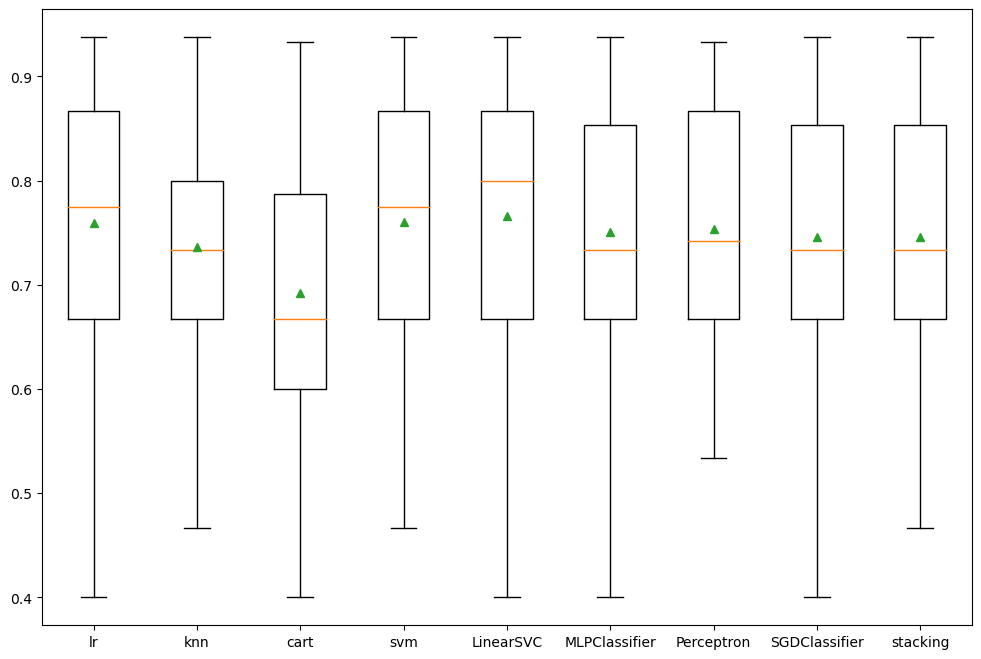

In [68]:
# תצוגת BOXPLOT של ביצועי המודלים
results_plot('boxplot', results , names)

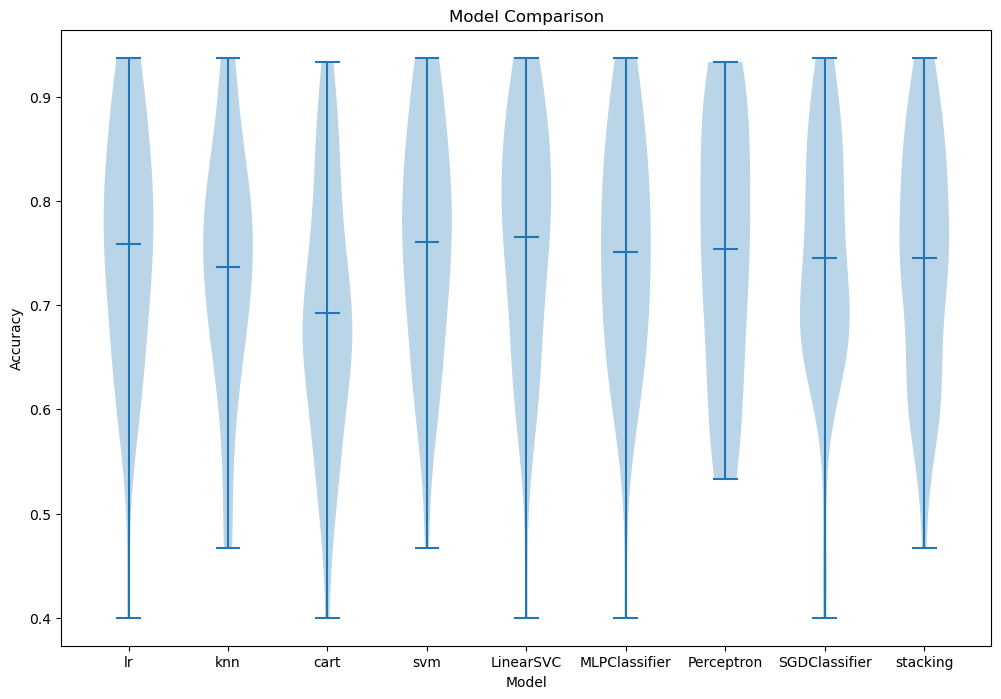

In [69]:
# תצוגת  violinplot של ביצוע המודלים
results_plot('violinplot', results , names)

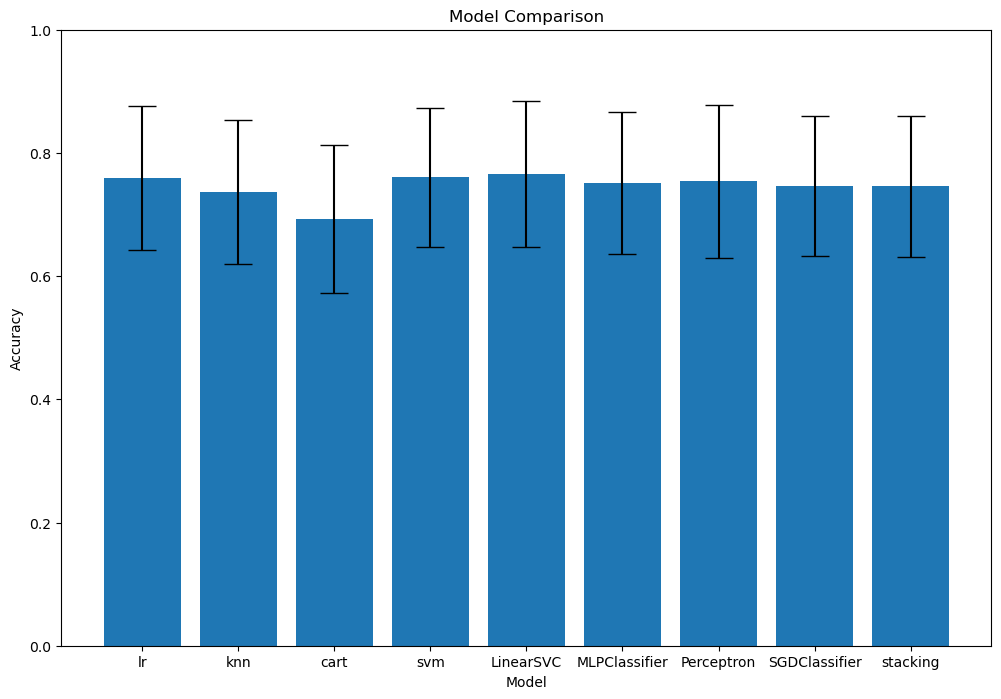

In [70]:
# תצוגת barplot של ביצועי המודלים
results_plot('barplot', results , names)

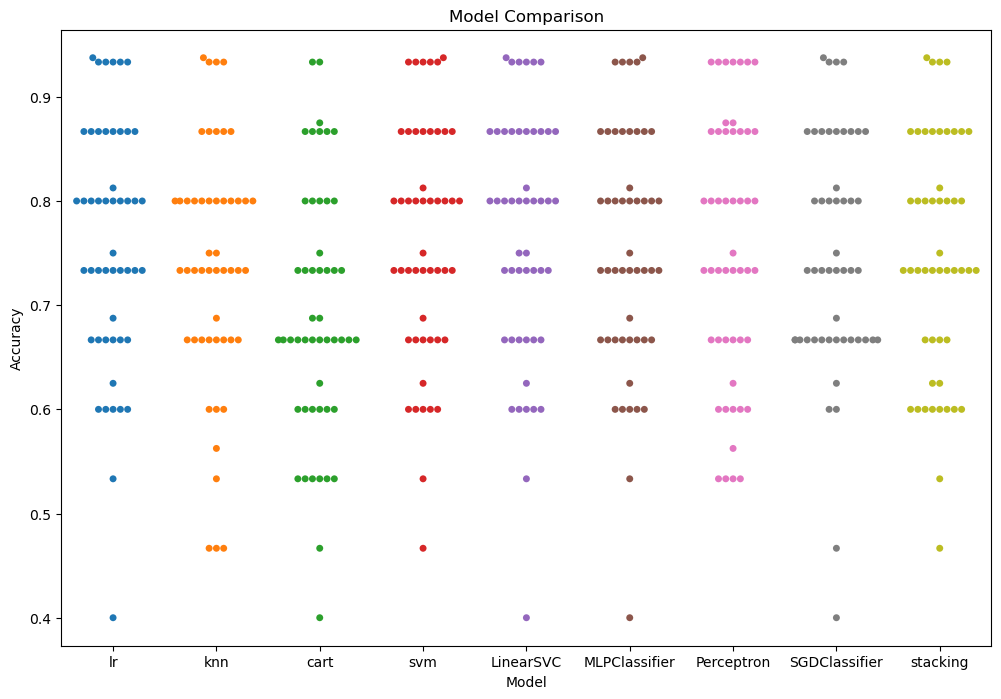

In [71]:
# תצוגת swarmplot של ביצועי המודלים
results_plot('swarmplot', results , names)

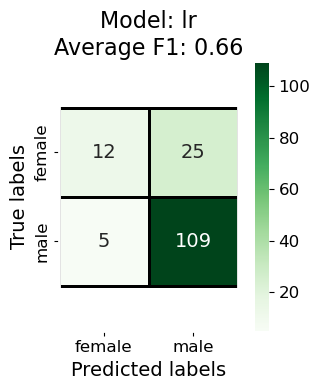

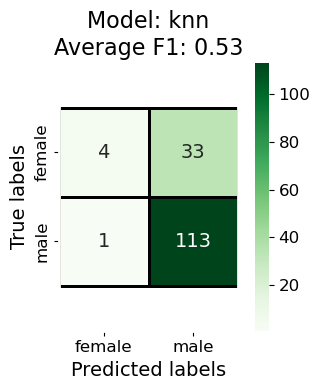

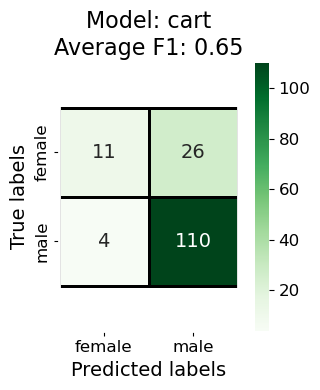

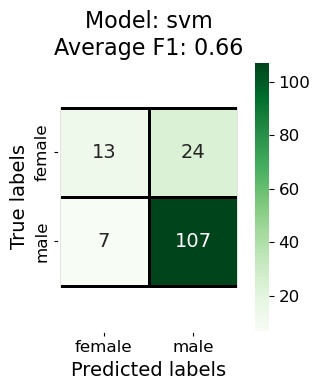

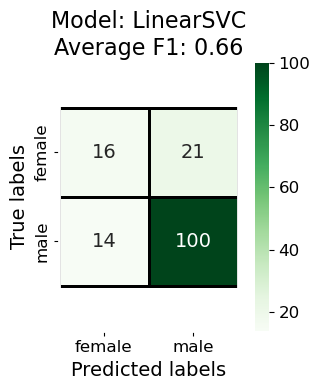

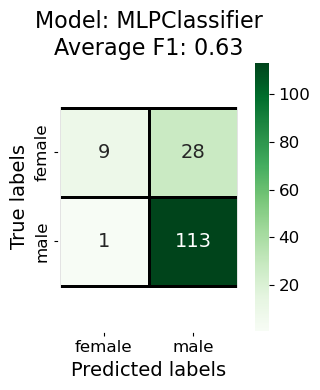

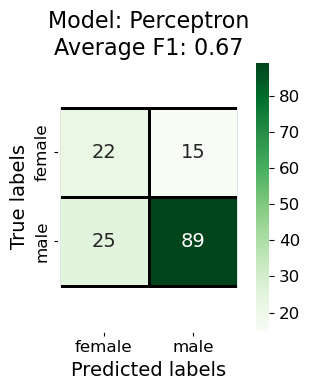

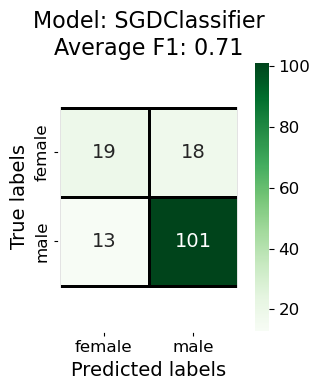

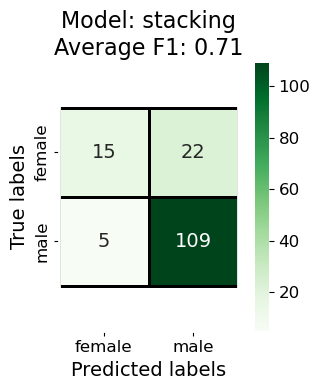

In [72]:
def plot_confusion_matrix(score):
    for mod in score:
        fig, ax = plt.subplots(figsize=(4, 4))

        sns.heatmap(score[mod]['Confusion Matrix'], annot=True, fmt='g', cmap='Greens', cbar=True,
                    annot_kws={'fontsize': 14}, ax=ax, square=True, linewidths=1, linecolor='black')

        ax.set_xlabel('Predicted labels', fontsize=14)
        ax.set_ylabel('True labels', fontsize=14)
        ax.set_xticklabels(['female', 'male'], fontsize=12)
        ax.set_yticklabels(['female', 'male'], fontsize=12)
        ax.set_title(f"Model: {mod}\nAverage F1: {score[mod]['average_f1']:.2f}", fontsize=16)
        
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        
        # הוספת צבע
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=12)
        
        # הוספת רקע לבן
        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_color('white')
            spine.set_linewidth(2)
        
        plt.tight_layout()
        plt.show()

plot_confusion_matrix(score)

הגדרת נתוני הבדקיה

In [73]:
data , test_data = set_test_data() 

חיזוי נתוני הבדיקה

In [74]:
def predict_test_data(score):
    df_predict_dict = {}
    
    for mod in score:
        y_pred = score[mod]['model'].predict(test_data) 
        # יצירת דאטהפריים של תחזיות
        df_predict = pd.DataFrame({'story': data, 'predicted gender': y_pred}) 
        # הדפס את שם המודל
        print(f"-----Model {mod}------") 
        # הדפס את כמות הנשים והגברים
        print(df_predict['predicted gender'].value_counts()) 
        print('-------------------')
        print("\n") 
        # אחסן את נתוני החיזוי
        df_predict_dict[mod] = df_predict 

    return df_predict_dict


חיזוי נתוני הבדיקה וקבלת התחזיות של כלל המודלים

In [75]:
df_predict_dict = predict_test_data(score) 
df_predicted = df_predict_dict['stacking'] 

-----Model lr------
m    275
f     48
Name: predicted gender, dtype: int64
-------------------


-----Model knn------
m    323
Name: predicted gender, dtype: int64
-------------------


-----Model cart------
m    286
f     37
Name: predicted gender, dtype: int64
-------------------


-----Model svm------
m    291
f     32
Name: predicted gender, dtype: int64
-------------------


-----Model LinearSVC------
m    187
f    136
Name: predicted gender, dtype: int64
-------------------


-----Model MLPClassifier------
m    310
f     13
Name: predicted gender, dtype: int64
-------------------


-----Model Perceptron------
m    188
f    135
Name: predicted gender, dtype: int64
-------------------


-----Model SGDClassifier------
m    290
f     33
Name: predicted gender, dtype: int64
-------------------


-----Model stacking------
m    251
f     72
Name: predicted gender, dtype: int64
-------------------




### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [76]:
df_predicted.to_csv('classification_results.csv',index=False)